# analysis of pp-SRC c.m. momentum simulations

# imports

In [1]:
from notebook_tools import *
%matplotlib inline

# read data

runs 20,000-30,000

sims0 = pd.read_csv( '/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs20000to30000_NsigmaT_10_NSigmaZa1_5_NSigmaZa2_8_NMeanZa1_5_NMeanZa2_5_NRand_10_simulationruns_results.csv')

runs 50,000 to 68,746

sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs50000to68746_NsigmaT_15_NSigmaZa1_10_NSigmaZa2_5_NMeanZa1_5_NMeanZa2_5_NRand_10_simulationruns_results.csv')

runs 100,000 to 200800

sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs100000to200799_10SigmaT_10SigmaZa1_10SigmaZa2_10MeanZa1_10MeanZa2_10NRand_results.csv')

In [59]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs500000to5018543_30SigmaT_5SigmaZa1_5SigmaZa2_5MeanZa1_5MeanZa2_10NRand_results.csv',na_filter=0.0)

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (1,124,127,135,136,142,163,165,166) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
def draw_PvalWeighting_Fit2Gaussian(var='SigmaX',xlabel='',
                                    bins=50,
                                    legend_loc='bbox',
                                    target='12C',
                                    do_fit_gaussian=True,
                                    x_range = None,
                                    y_range = None,
                                    xtext = None , ytext=None):
    
    weights=[sims.run/sims.run,sims['Pval'+var+'_unweighted_'+target],sims['PvalTotal_unweighted_'+target]]#,sims.KSxPval]
    weighting_labels=['generated','$Pval$ weighted','$Pval_{tot}$ weighted']#,'$KS_{tot}$ weighted']
    histograms , bins = plot_1d_withoutandwithweight(sims['gen'+var],
                                                     weights=weights,
                                                     weighting_labels = weighting_labels,
                                                     bins=bins,
                                                     legend_loc=legend_loc,
                                                     fontsize=20,
                                                     xlabel=xlabel,
                                                     x_range=x_range,                                                    
                                                     y_range=y_range);
    do_show_gaussians = [False , True , True , False]
    
    for hw,weight,weighting_label,do_show_gaussian in zip(histograms,weights,weighting_labels,do_show_gaussians):
        mu = np.average(sims['gen'+var] , weights=weight)
        variance = np.average((sims['gen'+var]-mu)**2, weights=weight)
        sigma = np.sqrt(variance)
                                                                           
        if do_fit_gaussian and do_show_gaussian:
            x = np.linspace(bins.min(),bins.max(),100)
            y = mlab.normpdf( x, mu, sigma) # bins
            ynormed = y*(hw.max()/y.max())
            plt.plot(x, ynormed, '--', linewidth=2)
        print weighting_label + ': \n mean=%.3f , stdev=%.3f'%(mu,sigma)
        
    
def draw_PvalWeighting_2d( df , v1 , v2 , bins=40 , weights=None , cmap='Greys' ,
                          xlabel=None,ylabel=None ,
                         figsize=(10,10),title=None):
    fig,ax=plt.subplots(figsize=figsize)
    plt.hist2d(df[v1],df[v2],bins=bins,weights=weights,cmap=cmap);
    plt.colorbar()
    set_axes( ax , x_label , y_label )
    ax.set_title(title)
    
    
def draw_all_PvalWeighting_2d(v1='SigmaZa1' , v2='SigmaZa2' ,
                              xlabel='$\\sigma_{z}-a_{1}$',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]' ,
                              bins=40,
                              figsize=(10,10),
                              weights=None,
                              cmaps=None):
    
    for weight,cmap in zip(weights,cmaps):
        print weight , cmap
        title=weight
        weight=sims[weight] if weight is not None else None
        draw_PvalWeighting_2d( sims , 'gen'+v1 , 'gen'+v2 , bins=bins , weights=weight  , cmap=cmap ,
                              xlabel=xlabel,ylabel=ylabel, figsize=figsize , title=title);


# histograms of generated, and generated+weighted

In [54]:
# sims['PvalSigmaY_unweighted_12C'] = sims.PvalSigmaY_weighted_12C
# sims['PvalSigmaY_unweighted_27Al'] = sims.PvalSigmaY_weighted_27Al
sims['PvalSigmaY_unweighted_56Fe'] = sims.PvalSigmaY_weighted_56Fe
# sims['PvalSigmaY_unweighted_208Pb'] = sims.PvalSigmaY_weighted_208Pb


sims.to_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs500000to5018543_30SigmaT_5SigmaZa1_5SigmaZa2_5MeanZa1_5MeanZa2_10NRand_results.csv')

In [60]:
sims.PvalTotal_unweighted_56Fe

0         
1         
2         
3         
4         
5         
6         
7         
8         
9         
10        
11        
12        
13        
14        
15        
16        
17        
18        
19        
20        
21        
22        
23        
24        
25        
26        
27        
28        
29        
        ..
18513     
18514     
18515     
18516     
18517     
18518     
18519     
18520     
18521     
18522     
18523     
18524     
18525     
18526     
18527     
18528     
18529     
18530     
18531     
18532     
18533     
18534     
18535     
18536     
18537     
18538     
18539     
18540     
18541     
18542     
Name: PvalTotal_unweighted_56Fe, dtype: object

generated: 
 mean=0.164 , stdev=0.030
$Pval$ weighted: 
 mean=nan , stdev=nan
$Pval_{tot}$ weighted: 
 mean=nan , stdev=nan
generated: 
 mean=0.164 , stdev=0.030
$Pval$ weighted: 
 mean=nan , stdev=nan
$Pval_{tot}$ weighted: 
 mean=nan , stdev=nan


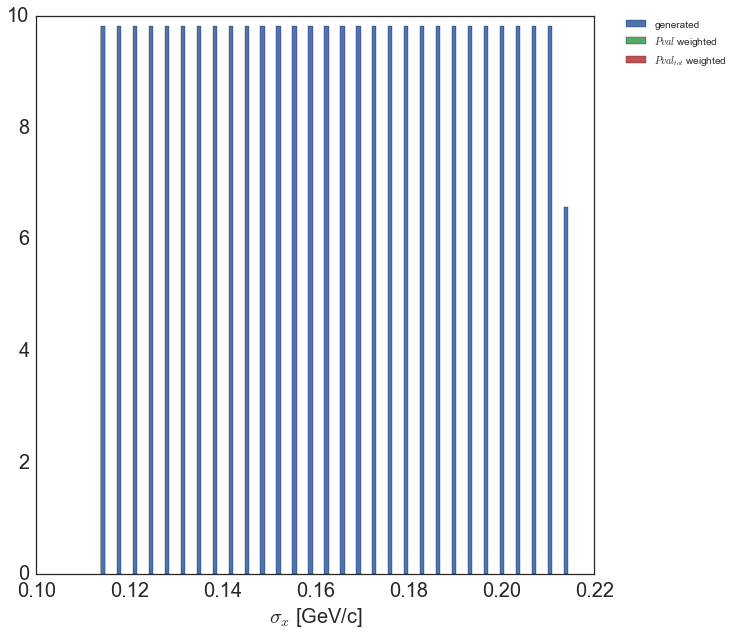

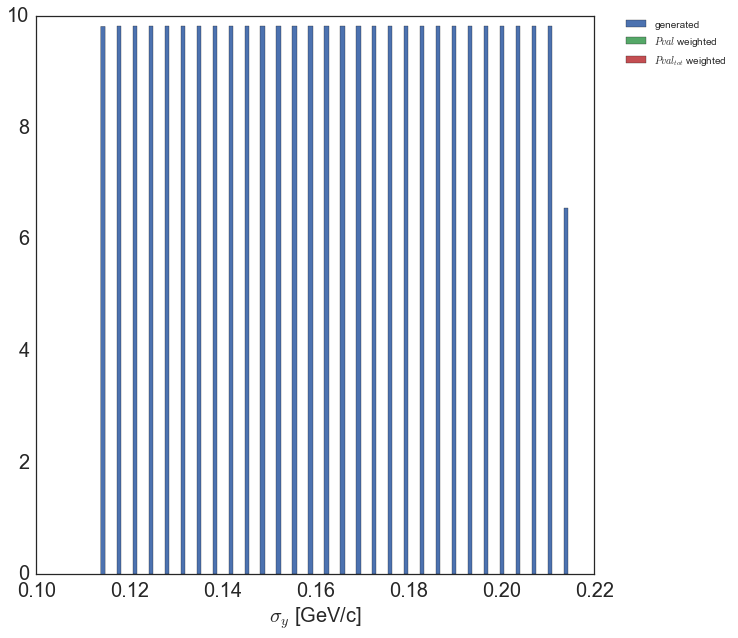

In [52]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaX',xlabel='$\\sigma_{x}$ [GeV/c]',bins=30,x_range=(0.1,0.22),target='56Fe')
draw_PvalWeighting_Fit2Gaussian(var='SigmaY',xlabel='$\\sigma_{y}$ [GeV/c]',bins=30,x_range=(0.1,0.22),target='56Fe')

In [21]:
draw_PvalWeighting_Fit2Gaussian(var='MeanX',xlabel='$\\mu_{x}$ [GeV/c]',bins=30,x_range=(-0.1,0.1))
draw_PvalWeighting_Fit2Gaussian(var='MeanY',xlabel='$\\mu_{y}$ [GeV/c]',bins=30,x_range=(-0.1,0.1))

KeyError: 'PvalMeanX_unweighted_12C'

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa1',xlabel='$\\sigma_{z}-a_{1}$',
                                bins=20,do_fit_gaussian=False,x_range=(-0.1,1.4),xtext=0.23)

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa2',xlabel='$\\sigma_{z}-a_{2}$ [GeV/c]',
                                bins=20,do_fit_gaussian=False)

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='MeanZa1',xlabel='$\\mu_{z}-a_{1}$',
                                bins=10,x_range=(0.35,0.85),xtext=0.82,do_fit_gaussian=False,legend_loc='none')

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='MeanZa2',xlabel='$\\mu_{z}-a_{2}$ [GeV/c]',
                                bins=10,legend_loc='upper left',xtext=-0.34,ytext=0.23,do_fit_gaussian=False)

# runs 100,000 to 200,7999

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa1',xlabel='$\\sigma_{z}-a_{1}$',
                                bins=20,do_fit_gaussian=False,x_range=(-1,2.4),y_range=(0,1.7),xtext=0.23)
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa2',xlabel='$\\sigma_{z}-a_{2}$ [GeV/c]',
                                bins=20,x_range=(-0.3,0.2),do_fit_gaussian=False)

# runs 300,000 to 460,000

In [ ]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs300000to460000_NsigmaT_1_NSigmaZa1_20_NSigmaZa2_20_NMeanZa1_20_NMeanZa2_20_NRand_10_simulationruns_results.csv')

sum up Pval for only two variables at a time

In [ ]:
PvalMeanZa1MeanZa2 , PvalSigmaZa1SigmaZa2 , PvalSigmaZa1MeanZa2 , PvalSigmaZa2MeanZa1 , PvalSigmaZa1MeanZa1 , PvalSigmaZa2MeanZa2 = [] , [] , [] , [], [], []
for index, row in sims.iterrows():
    if index%10000==0 : print index
    PvalSigmaZa1SigmaZa2.append(Fisher_combination_Pvals( [ row.PvalSigmaZa1_unweighted , row.PvalSigmaZa2_unweighted ] ) ) 
    PvalMeanZa1MeanZa2.append(Fisher_combination_Pvals( [ row.PvalMeanZa1_unweighted , row.PvalMeanZa2_unweighted ] ) ) 
    
    PvalSigmaZa1MeanZa1.append(Fisher_combination_Pvals( [ row.PvalSigmaZa1_unweighted , row.PvalMeanZa1_unweighted ] ) )    
    PvalSigmaZa1MeanZa2.append(Fisher_combination_Pvals( [ row.PvalSigmaZa1_unweighted , row.PvalMeanZa2_unweighted ] ) )
    
    PvalSigmaZa2MeanZa1.append(Fisher_combination_Pvals( [ row.PvalSigmaZa2_unweighted , row.PvalMeanZa1_unweighted ] ) )
    PvalSigmaZa2MeanZa2.append(Fisher_combination_Pvals( [ row.PvalSigmaZa2_unweighted , row.PvalMeanZa2_unweighted ] ) )
print 'done.'

In [ ]:
sims['PvalSigmaZa1SigmaZa2'] = PvalSigmaZa1SigmaZa2
sims['PvalMeanZa1MeanZa2'] = PvalMeanZa1MeanZa2
sims['PvalSigmaZa1MeanZa1'] = PvalSigmaZa1MeanZa1
sims['PvalSigmaZa1MeanZa2'] = PvalSigmaZa1MeanZa2
sims['PvalSigmaZa2MeanZa1'] = PvalSigmaZa2MeanZa1
sims['PvalSigmaZa2MeanZa2'] = PvalSigmaZa2MeanZa2

In [ ]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs300000to460000_1sT_20sZa1_20sZa2_20mZa1_20mZa2_10r_results.csv')

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaX',xlabel='$\\sigma_{x}$ [GeV/c]',bins=15)
draw_PvalWeighting_Fit2Gaussian(var='SigmaY',xlabel='$\\sigma_{y}$ [GeV/c]',bins=15)

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa1',xlabel='$\\sigma_{z}-a_{1}$',
                                bins=20,do_fit_gaussian=False,x_range=(-.1,2.4),y_range=(0,1.7),xtext=0.23)
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa2',xlabel='$\\sigma_{z}-a_{2}$ [GeV/c]',
                                bins=20,x_range=(-0.55,0.55),do_fit_gaussian=False)

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='MeanZa1',xlabel='$\\mu_{z}-a_{1}$',
                                bins=10,x_range=(0.,1.2),xtext=0.82,do_fit_gaussian=False,legend_loc='none')
draw_PvalWeighting_Fit2Gaussian(var='MeanZa2',xlabel='$\\mu_{z}-a_{2}$',
                                bins=10,x_range=(-0.55,0.55),xtext=0.82,do_fit_gaussian=False,legend_loc='none')

In [ ]:
cmaps = ['Blues' , 'Reds' , 'Greens' , 'Purples']

In [ ]:
weights = [None , 'PvalSigmaZa1SigmaZa2' , 'PvalTotal_unweighted' , 'KStPval_avg' ]
draw_all_PvalWeighting_2d(v1='SigmaZa1' , v2='SigmaZa2', bins=41 ,
                          xlabel='$\\sigma_{z}-a_{1}$',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);

In [ ]:
weights = [None , 'PvalMeanZa1MeanZa2' , 'PvalTotal_unweighted' , 'KSPval_tot' ]
draw_all_PvalWeighting_2d(v1='MeanZa1' , v2='MeanZa2', bins=41 ,
                          xlabel='$\\mu_{z}-a_{1}$',ylabel='$\\mu_{z}-a_{2}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);

In [ ]:
weights = [None , 'PvalSigmaZa2MeanZa1' , 'PvalTotal_unweighted' , 'KSPval_tot' ]
draw_all_PvalWeighting_2d(v1='MeanZa1' , v2='SigmaZa2', bins=41 ,
                          xlabel='$\\mu_{z}-a_{1}$',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);

In [ ]:
weights = [None , 'PvalSigmaZa2MeanZa2' , 'PvalTotal_unweighted' , 'KSPval_tot' ]
draw_all_PvalWeighting_2d(v1='MeanZa2' , v2='SigmaZa2', bins=41 ,
                          xlabel='$\\mu_{z}-a_{2}$',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);

In [ ]:
weights = [None , 'PvalSigmaZa1MeanZa1' , 'PvalTotal_unweighted' , 'KSPval_tot' ]
draw_all_PvalWeighting_2d(v1='MeanZa1' , v2='SigmaZa1', bins=41 ,
                          xlabel='$\\mu_{z}-a_{1}$',ylabel='$\\sigma_{z}-a_{1}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);

In [ ]:
weights = [None , 'PvalSigmaZa1MeanZa2' , 'PvalTotal_unweighted' , 'KSPval_tot' ]
draw_all_PvalWeighting_2d(v1='MeanZa2' , v2='SigmaZa1', bins=41 ,
                          xlabel='$\\mu_{z}-a_{2}$',ylabel='$\\sigma_{z}-a_{1}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);